In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [2]:
stop_words = [x for x in stopwords.words("english") if x not in ['nor', 'no', 'not', 'couldn',  "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]]

In [3]:
UScomments = pd.read_csv('../../data/UScomments.csv', error_bad_lines = False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# UScomments = UScomments.head(100000) # TODO: remover

In [5]:
%%time
pol = [] # list which will contain the polarity of the comments
for i in UScomments.comment_text.values:
    try:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

Wall time: 10min 26s


In [6]:
pol_ranges = [int(x) for x in pol]

In [7]:
UScomments['sentiment'] = pol_ranges

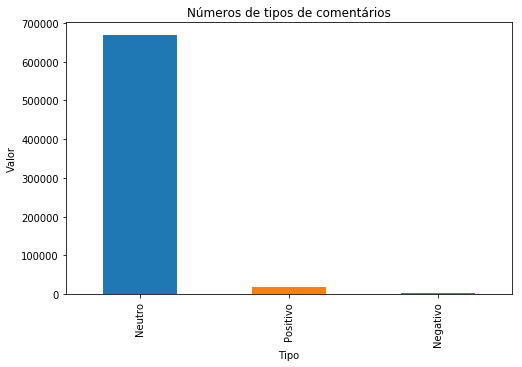

In [8]:
UScomments['sentiment'].replace({1:'Positivo', 0:'Neutro', -1:'Negativo'}).value_counts().plot(kind='bar',figsize=(8,5));
plt.title('Números de tipos de comentários');
plt.xlabel('Tipo');
plt.ylabel('Valor');

In [9]:
%%time
stop_words = [x for x in stopwords.words("english") if x not in ['nor', 'no', 'not']]
UScomments = UScomments[UScomments.sentiment != 0]
UScomments['text'] = UScomments['comment_text'].apply(lambda x: x.lower())
UScomments['text'] = UScomments['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
UScomments['text'] = UScomments['text'].apply((lambda x: ' '.join([word for word in x.split() if word not in stop_words])))

Wall time: 1.23 s


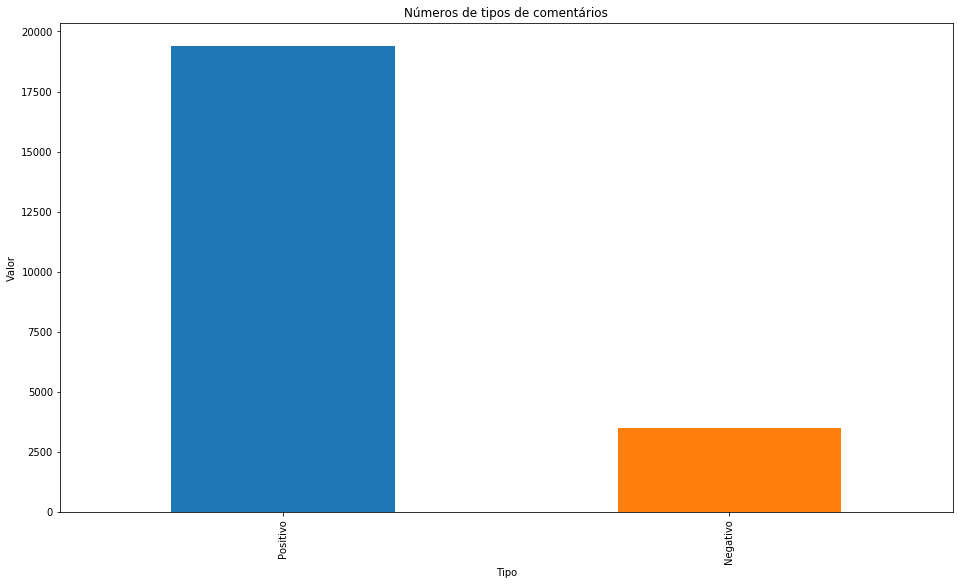

In [10]:
UScomments['sentiment'].replace({1:'Positivo', -1:'Negativo'}).value_counts().plot(kind='bar',figsize=(16,9));
plt.title('Números de tipos de comentários');
plt.xlabel('Tipo');
plt.ylabel('Valor');

In [11]:
UScomments.head()

,video_id,comment_text,likes,replies,sentiment,text
64,XpVt6Z1Gjjo,yu are the best,1,0,1,yu best
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1,power disease care cure keep caring others bes...
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1,yas cant wait get need sell kidney afford ipho...
307,sjlHnJvXdQs,This is priceless,0,0,1,priceless
319,sjlHnJvXdQs,Summed up perfectly,0,0,1,summed perfectly


In [12]:
UScomments.to_csv('UScommentsClean.csv')